In [1]:
import sys

sys.path.append("../")
import numpy as np
import matplotlib.pyplot as plt

#load the necessary odometry modules
from cpsl_datasets.athena_uav_ds import AthenaUAVDS

from geometries.pose.orientation import Orientation
from geometries.pose.position import Position
from geometries.coordinate_systems import coordinate_system_conversions
from geometries.transforms.transformation import Transformation

/home/david/.cache/pypoetry/virtualenvs/cpsl-datasets-3RqKbDu9-py3.12/lib/python3.12/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


In [2]:
from dotenv import load_dotenv
import os

#loading enviroment variables
load_dotenv()
DATASET_PATH=os.getenv("AHENA_DATASET_DIRECTORY")
depth_sensor_file = "depth.txt"
state_dict_file = "state.txt"

dataset = AthenaUAVDS(
    dataset_path=DATASET_PATH,
    depth_sensor_file=depth_sensor_file,
    state_dict_file=state_dict_file
)

loaded 854 state dict samples
loaded 854 depth samples
using 853 depth samples with valid time steps


In [6]:
idx = 0
dataset_idx = dataset.valid_data_idxs[idx]
stamp = dataset.depth_time_stamps[dataset_idx]
dataset.get_state_data_raw_at_stamp(stamp_s=stamp)

array([ 0.598   , -0.052   ,  0.026904, -0.009   ,  0.034904,  0.016   ])

In [4]:
depth_vals = dataset.depth_data[dataset_idx,:]
print(depth_vals[0,:])

[0.98  0.902 0.927 1.09  1.096 1.005 1.063 0.944]


In [17]:
idx = 852
pose,pts = dataset.get_data_at_idx(idx)
print(pose)

Pose(position=Position(x=5.666133, y=-2.281152, z=0.508943), orientation=Orientation(qx=-0.010084271872744598, qy=0.0029434620570014123, qz=0.9305379785842957, qw=0.36604468839769916))


(0.0, 4.0)

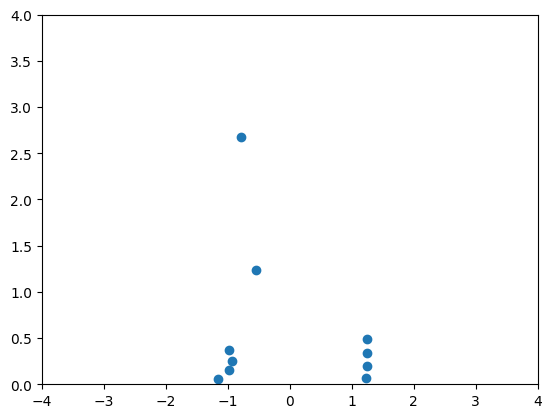

In [18]:
#ransform into new coordinate frame
rotation = Orientation.from_euler(
    yaw=90.0,
    degrees=True
)
transformation = Transformation(rotation=rotation._orientation)
pts = transformation.apply_transformation(
    pts
)

plt.scatter(
    pts[:,0],
    pts[:,1]
)
plt.xlim((-4.0,4.0))
plt.ylim((0.0,4.0))

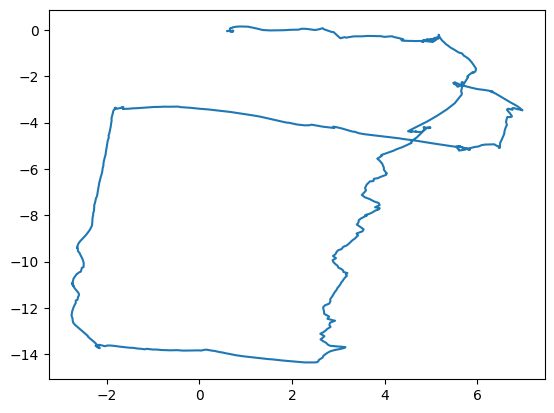

In [6]:
#plotting the overall trajectory
plt.plot(
    dataset.state_data[:,0],
    dataset.state_data[:,1]
)